In [22]:
from kaggle_environments import evaluate
from matplotlib import pyplot as plt

from ml_soln.connectx import ctx
from ml_soln.connectx.agent import model_agent
from ml_soln.connectx.train import TrainState

In [23]:
JOB_NAME = 'connectx-2024-10-20-02-41-23-599'
model = ctx().model_persistence.load_model(JOB_NAME)
train_state: TrainState = ctx().model_persistence.load_history(JOB_NAME)

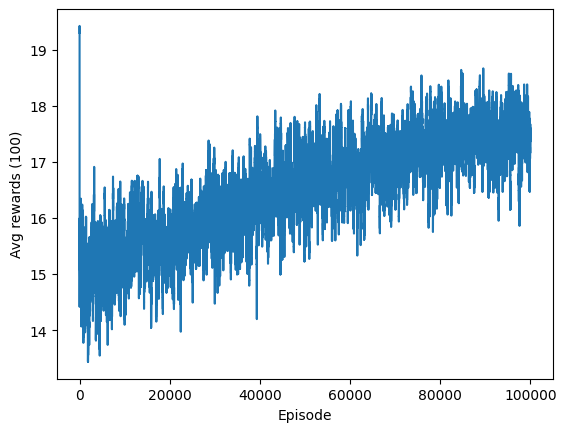

In [24]:
plt.plot(train_state.all_avg_rewards)
plt.xlabel('Episode')
plt.ylabel('Avg rewards (100)')
plt.show()

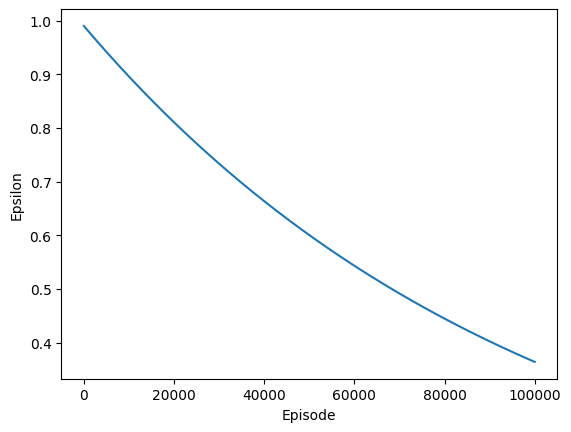

In [25]:
plt.plot(train_state.all_epsilons)
plt.xlabel('Episode')
plt.ylabel('Epsilon')
plt.show()

In [26]:
agent = model_agent(model)

In [27]:
def mean_reward(rewards, agent_player):
    return sum(r[agent_player] == 1 for r in rewards) / len(rewards)

# Run multiple episodes to estimate agent's performance.
# NOTE: Connect X is solvable using minimax/negamax algorithms. The negamax agent is an approximation of an algorithmic (not statistical) solution.
print("My Agent vs. Random Agent:", mean_reward(evaluate("connectx", [agent, "random"], num_episodes=10), agent_player=0))
print("My Agent vs. Negamax Agent:", mean_reward(evaluate("connectx", [agent, "negamax"], num_episodes=10), agent_player=0))
print("Random Agent vs. My Agent:", mean_reward(evaluate("connectx", ["random", agent], num_episodes=10), agent_player=1))
print("Negamax Agent vs. My Agent:", mean_reward(evaluate("connectx", ["negamax", agent], num_episodes=10), agent_player=1))

My Agent vs. Random Agent: 0.9
My Agent vs. Negamax Agent: 0.0
Random Agent vs. My Agent: 0.8
Negamax Agent vs. My Agent: 0.0


In [30]:
# Run the basic agent against a default agent which chooses a "random" move.
_ = ctx().kaggle_env.run([agent, "negamax"])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [31]:
import webbrowser

html = ctx().kaggle_env.render(mode="html")
html_path = ctx().paths.clone(JOB_NAME).model_dir / '..' / 'game.html'
html_path = html_path.resolve().absolute()
with open(html_path, 'w') as f:
    f.write(html)

webbrowser.open_new_tab(f'file://{html_path}')

True